In [34]:
%matplotlib inline
import os
import numpy as np
from matplotlib import pyplot as plt, ticker, dates as mdates
from pysar.simulation.plot import *
from pysar.utils import utils as ut, ptime, plot as pp
from pysar import view

work_dir = os.path.expanduser('~/development/python/2019_Kirishima/Kirishima2011')
os.chdir(work_dir)
print('Go to directory', work_dir)

dem_file  = os.path.expanduser('~/insarlab/Kirishima/DEM/Kirishima.dem.wgs84')
#dem_file  = os.path.expanduser('~/insarlab/Kirishima/DEM/gsi100m.dem.wgs84')

Go to directory /Users/yunjunz/development/python/2019_Kirishima/Kirishima2011


save figure to file /Users/yunjunz/development/python/2019_Kirishima/Kirishima2011/preAlosA.png


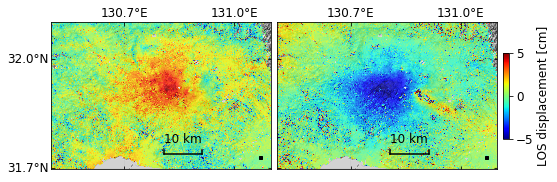

In [35]:
proj_dir = os.path.expanduser('~/insarlab/Kirishima/KirishimaAlosAT424/PYSAR')
ts_file = os.path.join(proj_dir, 'timeseries_ERA5_ramp_demErr.h5')
mask_file = os.path.join(proj_dir, 'maskTempCoh.h5')

## Figure (a-b) Map view of deformation from InSAR
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[8, 3], sharex=True)

# view.py options
#opt = ' --sub-lon 130.855 130.91 --sub-lat 31.885 31.94 '
opt = ''
opt += '--dem {} --shade-max -8000 --shade-max 4000 '.format(dem_file)
opt += ' -c jet -v -5 5 -u cm --notitle --fontsize 12 --ref-size 3 --lalo-step 0.3 --nocbar '
opt += ' --scalebar 0.25 0.6 0.1 --scalebar-pad 0.1 --noverbose --alpha 0.8 '

# pre-eruptive inflation
date1, date2 = '20071112', '20101120'
cmd = 'view.py {ts} {d2} --ref-date {d1} --mask {m} '.format(ts=ts_file, d1=date1, d2=date2, m=mask_file)
cmd += ' --lalo-loc 1 0 1 0 {o}'.format(o=opt)
data1, atr, inps = view.prep_slice(cmd)
axs[0], inps, im, cbar = view.plot_slice(axs[0], data1, atr, inps)

# co-eruptive deflation
date1, date2 = '20101120', '20110220'
cmd = 'view.py {ts} {d2} --ref-date {d1} --mask {m} '.format(ts=ts_file, d1=date1, d2=date2, m=mask_file)
cmd += ' --lalo-loc 0 0 1 0 {o}'.format(o=opt)
data1, atr, inps = view.prep_slice(cmd)
axs[1], inps, im, cbar = view.plot_slice(axs[1], data1, atr, inps)
fig.subplots_adjust(wspace=0.03)

# colorbar
cax = fig.add_axes([0.91, 0.3, 0.01, 0.4])
cbar = plt.colorbar(im, cax=cax, orientation='vertical', ticks=[-5, 0, 5])
cbar.ax.tick_params(labelsize=font_size)
cbar.set_label('LOS displacement [cm]', fontsize=font_size)

#output
out_file = os.path.join(work_dir, 'preAlosA.png')
print('save figure to file', out_file)
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
plt.show()